In [1]:
!pip install pycocotools

Defaulting to user installation because normal site-packages is not writeable


In [15]:
import json
from pycocotools.coco import COCO
import os
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as io

In [38]:
f = open('./annotations/captions_test2017.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)
f.close()

FileNotFoundError: [Errno 2] No such file or directory: './annotations/captions_test2017.json'

In [3]:
print(data.keys())

dict_keys(['info', 'licenses', 'images', 'annotations'])


In [5]:
print(data["annotations"][0])

{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}


loading annotations into memory...
Done (t=0.50s)
creating index...
index created!
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
indoor outdoor animal food furniture appliance kitchen vehicle electronic accessory sports person


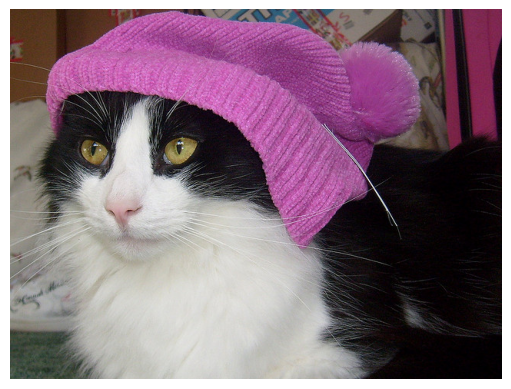

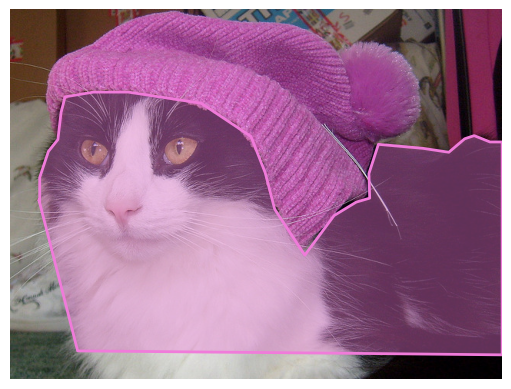

In [17]:
# Path to the COCO annotations file
dataDir = '.'
dataType = 'val2017'
annFile = '{}/annotations/instances_{}.json'.format(dataDir, dataType)

# Initialize COCO api for instance annotations
coco = COCO(annFile)

# Display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

# Get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['cat']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

# Load and display image
I = io.imread('%s/images/%s/%s' % (dataDir, dataType, img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

# Load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [39]:
from pycocotools.coco import COCO
import csv
import os

# Initialize COCO API for caption annotations
dataDir = '.'
dataType = 'train2017'
captions_annFile = os.path.join(dataDir, 'annotations', f'captions_{dataType}.json')
coco_captions = COCO(captions_annFile)

# Filter captions and compile image info
cat_images_dataset = []
for ann in coco_captions.anns.values():
    if ' cat ' in ann['caption'].lower() or ' cats ' in ann['caption'].lower():  # Check for 'cat' in the caption
        img_id = ann['image_id']
        img_info = coco_captions.loadImgs(img_id)[0]
        # Check if this image is already added
        if not any(d['image_id'] == img_id for d in cat_images_dataset):
            cat_images_dataset.append({
                'image_id': img_info['id'],
                'file_name': img_info['file_name'],
                'url': img_info.get('coco_url', 'N/A'),
                'captions': []
            })
        # Find the image in the dataset and add the caption
        for img in cat_images_dataset:
            if img['image_id'] == img_id:
                img['captions'].append(ann['caption'])
                break

# Save to CSV
csv_file_path = 'cat_images_with_cat_captions.csv'
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['image_id', 'file_name', 'url', 'captions'])
    for img in cat_images_dataset:
        captions_str = '|'.join(set(img['captions']))  # Remove duplicate captions
        writer.writerow([img['image_id'], img['file_name'], img['url'], captions_str])

print("Filtered dataset saved to CSV.")

loading annotations into memory...
Done (t=0.84s)
creating index...
index created!
Filtered dataset saved to CSV.


In [40]:
import pandas as pd

# Define the path to your CSV file
csv_file_path = 'cat_images_with_cat_captions.csv'

# Load the CSV data into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows to verify it's loaded correctly
print(df.head())

   image_id         file_name  \
0    285421  000000285421.jpg   
1    141172  000000141172.jpg   
2    548498  000000548498.jpg   
3    446409  000000446409.jpg   
4    536321  000000536321.jpg   

                                                 url  \
0  http://images.cocodataset.org/train2017/000000...   
1  http://images.cocodataset.org/train2017/000000...   
2  http://images.cocodataset.org/train2017/000000...   
3  http://images.cocodataset.org/train2017/000000...   
4  http://images.cocodataset.org/train2017/000000...   

                                            captions  
0  A black cat drinking water from a toilet|A cat...  
1  A door with a sticker of a cat door on it|A pi...  
2  A small white cat on a large bowl.|A cat is cu...  
3  A cat is resting underneath a bicycle wheel.|a...  
4  A cat sits behind a bicycle tire and peddles.|...  


/tmp/ipykernel_333714/822716898.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [42]:
from PIL import Image
import os

# Define the base directory of your COCO images
images_dir = './images/train2017'

# Example: Access the first image in the dataset
file_name = df.iloc[2]['file_name']  # Assuming the 'file_name' column exists
image_path = os.path.join(images_dir, file_name)

img = Image.open(image_path)
img.show()